In [1]:
# import packages that will be used for the logistics regression analysis
import pylab
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# import data set that will be used for the logistics regression analysis
pd.set_option('display.max_columns', None)
df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean.csv')

In [3]:
# check if there is any missing data entries. Output should be false.
df.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [4]:
# drop all the columns we don't need for this logistics analysis
df.drop(['Item8','Item7','Item6','Item5','Item4','Item3','Item2','Item1', 'CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job', ],axis = 1,inplace=True)
# verify that all the columns were dropped before proceeding
df.head()

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420
1,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120
2,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460
3,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350
4,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786


In [5]:
#Create dummies for Gender and the target variable 
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['ReAdmis_dummy'] = [1 if v == 'Yes' else 0 for v in df['ReAdmis']]

In [6]:
# convert categorical yes/no values to numeric 1/0 values
df = df.replace(to_replace = ['Yes','No'],value = [1,0])
df

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,gender_dummy,ReAdmis_dummy
0,1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,0,0
1,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,1,0
2,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,1,0
3,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,0,0
4,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,Male,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,51.561220,6850.942000,8927.642000,0,0
9996,4,87,14983.02,Widowed,Male,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,68.668240,7741.690000,28507.150000,0,1
9997,3,45,65917.81,Separated,Female,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,70.154180,8276.481000,15281.210000,1,1
9998,3,43,29702.32,Divorced,Male,1,19.910430,5,2,1,0,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,Blood Work,63.356900,7644.483000,7781.678000,0,1


In [7]:
# move the chosen target variable "ReAdmis" to beginning of the columns
df=df[['ReAdmis', 'Initial_days','Children', 'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge', 'Additional_charges']]
# Confirm that the target variable was moved before exporting the prepared dataset
my_list = df.columns.values.tolist()
print(my_list)
# describe the dataframe to identify distribution of variables
df.describe()

['ReAdmis', 'Initial_days', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge', 'Additional_charges']


,ReAdmis,Initial_days,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.366900,34.455299,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,0.257500,0.409000,0.199300,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930,5312.172769,12934.528587
std,0.481983,26.309341,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,0.437279,0.491674,0.399494,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346,2180.393838,6542.601544
min,0.000000,1.001981,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1938.312067,3125.703000
25%,0.000000,7.896215,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3179.374015,7986.487755
50%,0.000000,35.836244,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5213.952000,11573.977735
75%,1.000000,61.161020,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,7459.699750,15626.490000
max,1.000000,71.981490,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,9180.728000,30566.070000


In [8]:
# now that all the modifications have been made, export the prepared dataset
df.to_csv(r'C:\Users\fahim\Documents\0_WGUDocuments\d208\2medical_clean-PREPAREDTASK2_dec19.csv')

In [9]:
# identify the columns for numerical data
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)

Index(['ReAdmis', 'Initial_days', 'Children', 'Age', 'Income', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'TotalCharge', 'Additional_charges'],
      dtype='object')


In [10]:
# print the columns for categorical data
CategoricalData = df.select_dtypes(include = "object").columns
print(CategoricalData)

Index(['Marital', 'Gender', 'Initial_admin', 'Complication_risk', 'Services'], dtype='object')


In [11]:
# Callout the target variable "ReAdmis" and describe it's characteristics
target = 'ReAdmis'
for idx, c in enumerate(df.loc[:, df.columns == target]):
     if df.dtypes[c] == "object":
             print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
for idx,name in enumerate(df[c].value_counts().index.tolist()):
    print('\t{:<8}:{:>6}'.format(name,df[c].value_counts()[idx]))
    print('\n{}. {} is numerical.'.format(idx+1, c))

	0       :  6331

1. ReAdmis is numerical.
	1       :  3669

2. ReAdmis is numerical.


0    6331
1    3669
Name: ReAdmis, dtype: int64


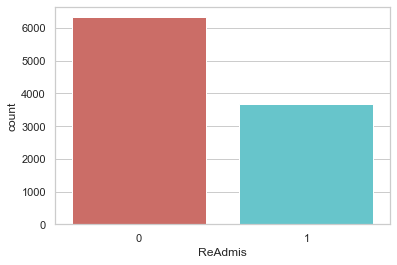

In [12]:
# begin visuallizing the data and include the univariate and bivariate analyses
print(df[target].value_counts())
sb.countplot(x=target, data=df, palette='hls')
plt.show()

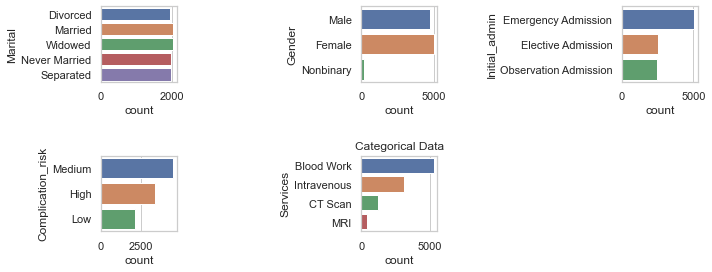

In [13]:
# visualize the categorical data and include the univariate and bivariate analyses
fig = plt.figure(figsize=(10, 20))
for i, col in enumerate(CategoricalData):
    if col != target:
        plt.subplot(10, 3, i+1)
        ax = sb.countplot(y=col, data=df)
        fig.tight_layout(h_pad=4, w_pad=4)
plt.title('Categorical Data')
plt.show()

<AxesSubplot:xlabel='Asthma'>

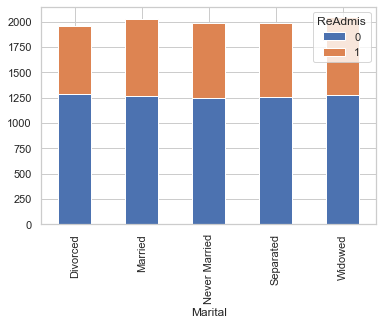

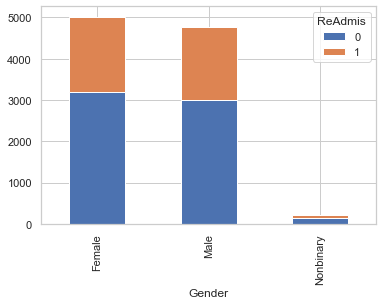

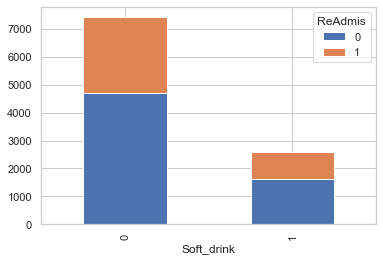

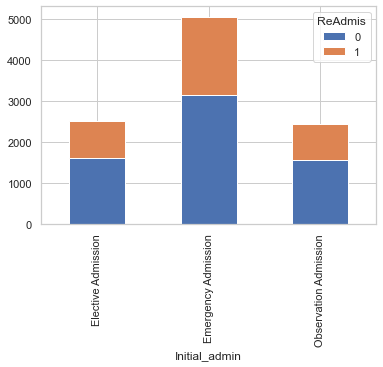

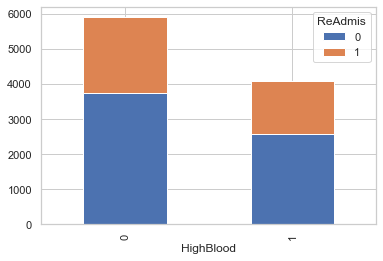

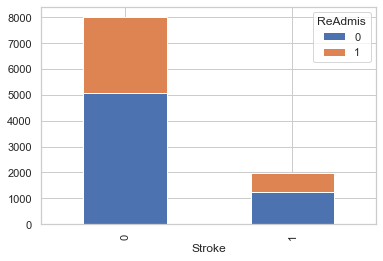

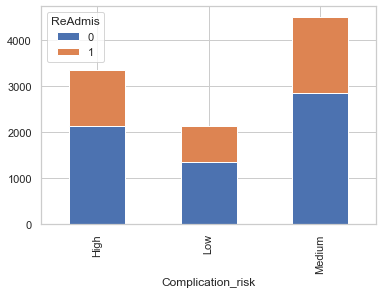

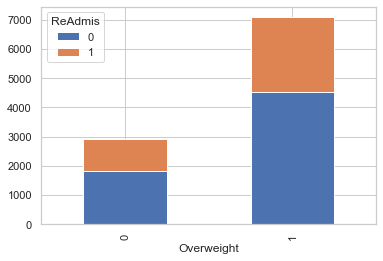

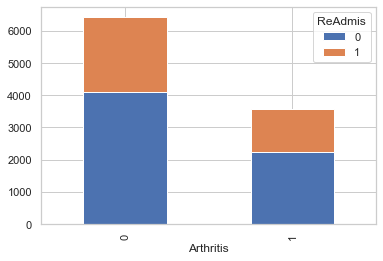

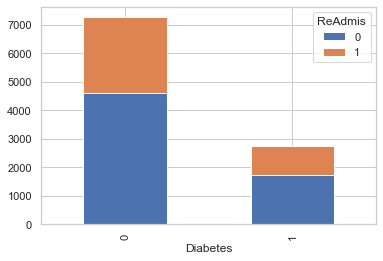

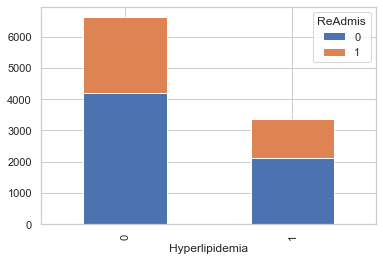

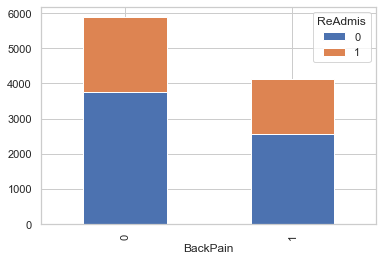

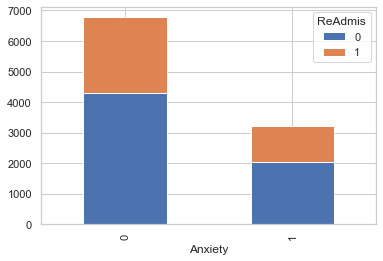

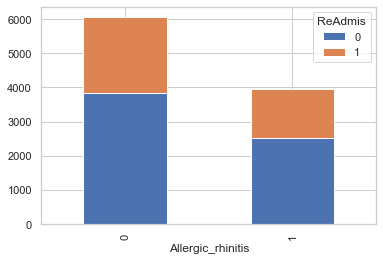

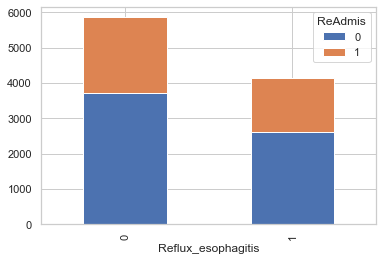

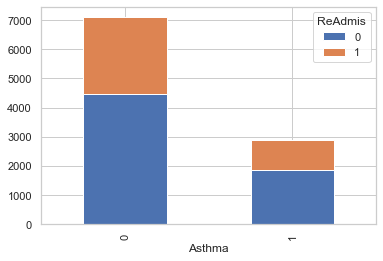

In [14]:
# Compare the target variable "ReAdmis" to ALL of the categorical variables
tbl = pd.pivot_table(df.groupby(['Marital','ReAdmis']).size().reset_index(),
values=0,
index='Marital',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Gender','ReAdmis']).size().reset_index(),
values=0,
index='Gender',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Soft_drink','ReAdmis']).size().reset_index(),
values=0,
index='Soft_drink',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Initial_admin','ReAdmis']).size().reset_index(),
values=0,
index='Initial_admin',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['HighBlood','ReAdmis']).size().reset_index(),
values=0,
index='HighBlood',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Stroke','ReAdmis']).size().reset_index(),
values=0,
index='Stroke',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Complication_risk','ReAdmis']).size().reset_index(),
values=0,
index='Complication_risk',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Overweight','ReAdmis']).size().reset_index(),
values=0,
index='Overweight',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Arthritis','ReAdmis']).size().reset_index(),
values=0,
index='Arthritis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Diabetes','ReAdmis']).size().reset_index(),
values=0,
index='Diabetes',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Hyperlipidemia','ReAdmis']).size().reset_index(),
values=0,
index='Hyperlipidemia',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['BackPain','ReAdmis']).size().reset_index(),
values=0,
index='BackPain',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Anxiety','ReAdmis']).size().reset_index(),
values=0,
index='Anxiety',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Allergic_rhinitis','ReAdmis']).size().reset_index(),
values=0,
index='Allergic_rhinitis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Reflux_esophagitis','ReAdmis']).size().reset_index(),
values=0,
index='Reflux_esophagitis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Asthma','ReAdmis']).size().reset_index(),
values=0,
index='Asthma',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)

In [19]:
# create the initial logistics model
df['Intercept'] = 1
log_reg_results = sm.Logit(df["ReAdmis"], df[['Children','Age','Income','Doc_visits','Initial_days','Gender','Intercept']]).fit()
print(log_reg_results.summary())

C:\Users\fahim\AppData\Local\Temp\ipykernel_15748\3849109210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Intercept'] = 1


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).